In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
cat_cols = list(df.select_dtypes(exclude="number"))
num_cols = list(df.select_dtypes(include="number"))

num_but_cat = [col for col in num_cols if df[col].nunique()<10]
cat_but_car = [col for col in cat_cols if df[col].nunique()>20]

cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
num_cols = [col for col in num_cols if col not in num_but_cat]

In [8]:
for col in df.columns:
    if df[col].dtypes == bool:
        df[col] = df[col].astype(int)

In [9]:
def cat_summary(df,col,plot=False):
   print(pd.DataFrame({col:df[col].value_counts(),
                        "ratio":df[col].value_counts(normalize=True)}))
   print("#########################################################")
   if plot:
       sns.countplot(x=df[col],data=df)
       plt.show()

          survived     ratio
survived                    
0              549  0.616162
1              342  0.383838
#########################################################


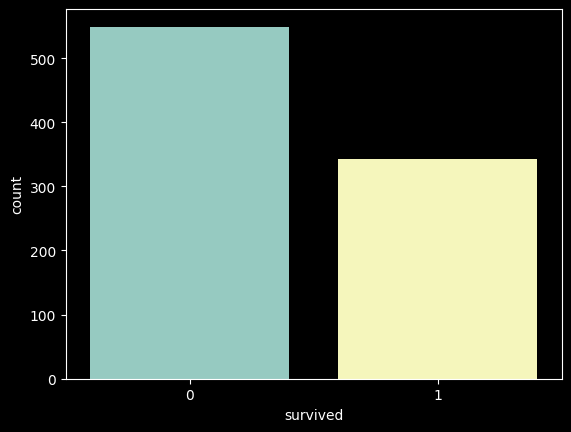

In [11]:
cat_summary(df,"survived",plot=True)

In [12]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [18]:
def target_summary(df,target,col):
    print(pd.DataFrame({"Target_mean":df.groupby(col)[target].mean()}))
    print("€€€€€€€€€€€€€€€€€€€")

In [19]:
target_summary(df,"survived","sex")

        Target_mean
sex                
female     0.742038
male       0.188908
€€€€€€€€€€€€€€€€€€€


In [20]:
for col in cat_cols:
    target_summary(df,"survived",col)

        Target_mean
sex                
female     0.742038
male       0.188908
€€€€€€€€€€€€€€€€€€€
          Target_mean
embarked             
C            0.553571
Q            0.389610
S            0.336957
€€€€€€€€€€€€€€€€€€€
        Target_mean
class              
First      0.629630
Second     0.472826
Third      0.242363
€€€€€€€€€€€€€€€€€€€
       Target_mean
who               
child     0.590361
man       0.163873
woman     0.756458
€€€€€€€€€€€€€€€€€€€
      Target_mean
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
€€€€€€€€€€€€€€€€€€€
             Target_mean
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
€€€€€€€€€€€€€€€€€€€
       Target_mean
alive             
no             0.0
yes            1.0
€€€€€€€€€€€€€€€€€€€
          Target_mean
survived             
0                 0.0
1                 1.0
€€€€€€€€€€€€€€€€€€€
    

In [21]:
df.groupby("survived").age.mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [27]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [32]:
def target_summary_num(df,target,col):
    print(df.groupby(target).agg({col:"mean"}))
    print("########################################")

for col in num_cols:
    target_summary_num(df,"survived",col)

                age
survived           
0         30.626179
1         28.343690
########################################
               fare
survived           
0         22.117887
1         48.395408
########################################
